<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./drive/My Drive/train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

**1) Посмотрите на случайные строчки.**

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


**2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.**

In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

**1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).**

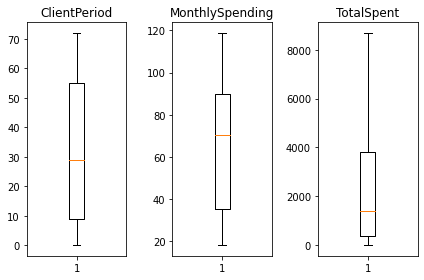

In [8]:
#В поле TotalSpent формат String, нужно поменять на float и избавиться от пустых значений
data['TotalSpent'] = data['TotalSpent'].replace(' ', 0).apply(float)

fig, axs = plt.subplots(1, len(num_cols))
axs = axs.ravel()

for x in range(len(num_cols)):
  column = num_cols[x]
  axs[x].boxplot(data.loc[:,column])
  axs[x].set_title(column)
fig.tight_layout()

In [9]:
data.Sex.value_counts()

Male      2655
Female    2627
Name: Sex, dtype: int64

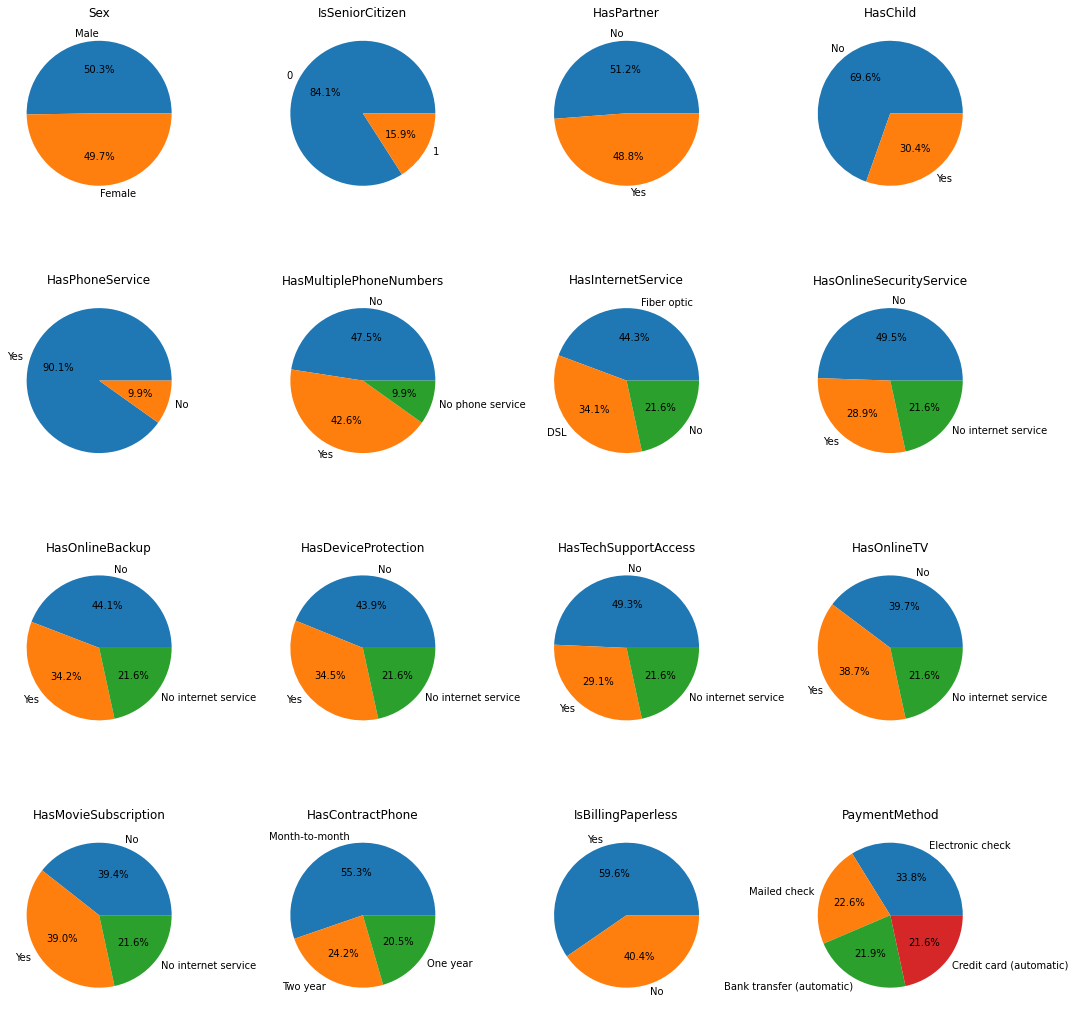

In [10]:
fig, axs = plt.subplots(4, 4,figsize=(15,15))
axs = axs.ravel()


for x in range(len(cat_cols)):
  column = cat_cols[x]
  counts = data.loc[:, column].value_counts()
  values = list(counts)
  labels = counts.index
  axs[x].pie(values, labels=labels, autopct='%1.1f%%')
  axs[x].set_title(column)
fig.tight_layout()

**2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.**

**Если считать несбалансированным класс имеющий 10% или меньше присутствия в датасете относительно любого другого класса, то таким будет являться класс 'No' поля 'HasPhoneService'**



## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [11]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

**1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.**

In [12]:
scaler = StandardScaler()

scaler.fit(data.loc[:,num_cols])
data.loc[:,num_cols] = scaler.transform(data.loc[:,num_cols])

data = data.join(pd.get_dummies(data.loc[:,cat_cols]), rsuffix='r').drop(columns=cat_cols)

**2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.**

In [13]:
y = data.loc[:, target_col]
X = data.drop(columns = target_col)

clf = GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]}, scoring = 'roc_auc', n_jobs=-1)

clf.fit(X, y)
None

**Выпишите какое лучшее качество и с какими параметрами вам удалось получить**

In [14]:
print('Параметр {}'.format(clf.best_params_))
print('Качество {}'.format(clf.best_score_))

Параметр {'C': 100}
Качество 0.8451111355319523


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [17]:
#!pip install catboost
from catboost import CatBoostClassifier

data = pd.read_csv('./drive/My Drive/train.csv')
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,feature_cols], data.loc[:,target_col], test_size=0.2, stratify = data.loc[:,target_col],random_state=42)

clf = GridSearchCV(estimator=CatBoostClassifier(), param_grid={'iterations':[8,16], 'learning_rate':[0.1, 0.5, 1], 'depth':[2,4,8,12]
                                                               , 'cat_features':[cat_cols]}, scoring = 'roc_auc', n_jobs=-1)

clf.fit(X_train, y_train)

0:	learn: 0.5607312	total: 57.2ms	remaining: 857ms
1:	learn: 0.4988302	total: 63.9ms	remaining: 448ms
2:	learn: 0.4637806	total: 74.7ms	remaining: 324ms
3:	learn: 0.4398122	total: 81.2ms	remaining: 243ms
4:	learn: 0.4288300	total: 84.5ms	remaining: 186ms
5:	learn: 0.4228257	total: 87.4ms	remaining: 146ms
6:	learn: 0.4193760	total: 90.6ms	remaining: 117ms
7:	learn: 0.4142000	total: 93.9ms	remaining: 93.9ms
8:	learn: 0.4119191	total: 97.1ms	remaining: 75.5ms
9:	learn: 0.4115103	total: 99.5ms	remaining: 59.7ms
10:	learn: 0.4093034	total: 103ms	remaining: 46.9ms
11:	learn: 0.4092909	total: 105ms	remaining: 35ms
12:	learn: 0.4087105	total: 108ms	remaining: 25ms
13:	learn: 0.4085723	total: 111ms	remaining: 15.9ms
14:	learn: 0.4085457	total: 115ms	remaining: 7.66ms
15:	learn: 0.4074836	total: 118ms	remaining: 0us


GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f947f69ca20>,
             iid='deprecated', n_jobs=-1,
             param_grid={'cat_features': [['Sex', 'IsSeniorCitizen',
                                           'HasPartner', 'HasChild',
                                           'HasPhoneService',
                                           'HasMultiplePhoneNumbers',
                                           'HasInternetService',
                                           'HasOnlineSecurityService',
                                           'HasOnlineBackup',
                                           'HasDeviceProtection',
                                           'HasTechSupportAccess',
                                           'HasOnlineTV',
                                           'HasMovieSubscription',
                                           'HasContractPhone',
                                           'Is

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [18]:
print('Параметр {}'.format(clf.best_params_))
print('Качество {}'.format(clf.best_score_))

Параметр {'cat_features': ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'], 'depth': 4, 'iterations': 16, 'learning_rate': 0.5}
Качество 0.8407617623684149


# Предсказания

In [19]:
best_model = CatBoostClassifier(depth= 2, iterations = 16, learning_rate = 1, cat_features=cat_cols)
best_model.fit(data.loc[:, feature_cols], data.loc[:, target_col], verbose = False)

In [20]:
X_test = pd.read_csv('./drive/My Drive/test.csv')
submission = pd.read_csv('./drive/My Drive/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.